In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
import math
import string
import sdeint
import random
#import superstatistics as ss
import statistics
import scipy.signal
import scipy.stats as st

from scipy.stats import lognorm, expon, rv_continuous, kurtosis, ttest_ind
from scipy import stats,optimize
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.special import gamma, digamma

from joblib import Parallel, delayed 
from matplotlib import gridspec
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import accumulate
from collections import Counter
from datetime import datetime,timedelta
from pandas.plotting import register_matplotlib_converters

In [6]:
#ADDITIVE
##Seasonal
df1 = pd.DataFrame({'site':pd.Series(['TBB','TKB','TChP','TH','TPut','TCaP','TBGP','TEB','TPur']),
                   'dist_to_sea': pd.Categorical([61.39, 59.96, 57.78, 56.64, 55.43, 51.91, 37.5, 28.77,23.26]),
                   'site type': pd.Categorical(['Coastal','Coastal','Estuarine','Estuarine','Estuarine','Estuarine','Estuarine','Estuarine','Estuarine']),
                   'q_seasonal': pd.Series([1.724, 1.674, 1.695, 1.799, 1.708, 1.775, 1.468, 1.592, 1.744]),
                   'b_seasonal': pd.Series([47.439, 60.926, 72.084, 112.77, 90.253, 114.428, 52.3, 100.78, 650.092]),
                   'method': pd.Categorical(['seasonal','seasonal','seasonal','seasonal','seasonal','seasonal','seasonal','seasonal','seasonal'])
              })

#EMD
df2 = pd.DataFrame({'site':pd.Series(['TBB','TKB','TChP','TH','TPut','TCaP','TBGP','TEB','TPur']),
                   'dist_to_sea': pd.Categorical([61.39, 59.96, 57.78, 56.64, 55.43, 51.91, 37.5, 28.77,23.26]),
                   'site type': pd.Categorical(['Coastal','Coastal','Estuarine','Estuarine','Estuarine','Estuarine','Estuarine','Estuarine','Estuarine']),
                   'q_EMD': pd.Series([1.691, 1.735, 1.849, 1.812, 1.853, 1.998, 1.834, 1.764, 1.872]),
                   'b_EMD': pd.Series([98.211, 204.243, 311.848, 420.02, 592.729, 600.971, 759.711, 206.058, 1465.417]),
                   'method': pd.Categorical(['EMD','EMD','EMD','EMD','EMD','EMD','EMD','EMD','EMD'])
              })


In [7]:
#MULTIPLICATIVE 
#Seasonal
df3 = pd.DataFrame({
    'site': pd.Series(['TBB', 'TKB', 'TChP', 'TH', 'TPut', 'TCaP', 'TBGP', 'TEB', 'TPur']),
    'dist_to_sea': pd.Categorical([61.39, 59.96, 57.78, 56.64, 55.43, 51.91, 37.5, 28.77, 23.26]),
    'site type': pd.Categorical(['Coastal', 'Coastal', 'Estuarine', 'Estuarine', 'Estuarine', 'Estuarine', 'Estuarine', 'Estuarine', 'Estuarine']),
    'q_seasonal': pd.Series([1.5660466158579749, 1.6975347818114295, 1.5149502974408298, 1.8053675346110136, 1.5149502974408298, 1.6329384962237041, 1.6314849357055257, 1.5799499058888697, 1.515]),
    'b_seasonal': pd.Series([2035.2961089378186, 6375.83385983686, 3163.4579041698553, 9602.296694846624, 3650.1437355806047, 4164.68523804701, 6083.572892634318, 6577.082978741982, 10950.431206741854]),
    'method': pd.Categorical(['Seasonal_multiplicative', 'Seasonal_multiplicative', 'Seasonal_multiplicative', 'Seasonal_multiplicative', 'Seasonal_multiplicative', 'Seasonal_multiplicative', 'Seasonal_multiplicative', 'Seasonal_multiplicative', 'Seasonal_multiplicative']),
    'std_errors': pd.Series(['0.004186446753428826, 39.840412509196014', '0.0011783709873340199, 67.7451863854691', '0.003462020500719686, 86.09483133972445', '0.0022206044948867697, 0.0013388790489907503', '0.002380545394080398, 0.003420796310699062', '0.0026761929063794988, 86.84614560866305', '0.0019944491426842252, 4.427913943700314', '0.003537271617922265, 69.73144091158913', '0.0037439343666214302, 481.50712027090685'])
})

#EMD
df4 = pd.DataFrame({
    'site': pd.Series(['TBB', 'TKB', 'TChP', 'TH', 'TPut', 'TCaP', 'TBGP', 'TEB', 'TPur']),
    'dist_to_sea': pd.Categorical([61.39, 59.96, 57.78, 56.64, 55.43, 51.91, 37.5, 28.77, 23.26]),
    'site type': pd.Categorical(['Coastal', 'Coastal', 'Estuarine', 'Estuarine', 'Estuarine', 'Estuarine', 'Estuarine', 'Estuarine', 'Estuarine']),
    'q_EMD': pd.Series([1.563, 1.5302386068208307, 1.7105592549204158, 1.8537178626640367, 1.6314849357055257, 1.7615999436260426, 1.5892948739553643, 1.7478204346711812, 1.7480195739701887]),
    'b_EMD': pd.Series([1047.096, 6679.761293837619, 3716.9093642799917, 3835.8228074343824, 12167.145785268636, 7789.01592287255, 8115.015906465252, 12050.60303871314, 18250.718677903045]),
    'method': pd.Categorical(['EMD_multiplicative', 'EMD_multiplicative', 'EMD_multiplicative', 'EMD_multiplicative', 'EMD_multiplicative', 'EMD_multiplicative', 'EMD_multiplicative', 'EMD_multiplicative', 'EMD_multiplicative']),
    'std_errors': pd.Series(['0.0019260860092667165, 21.98197665519557', '0.0019529790719764828, 0.7120445112673591', '0.0025429329940808887, 71.1116658262868', '0.0025026845676235088, 128.66392110504074', '0.00167077655258094, 21.948019854930944', '0.0015969943356092418, 0.004797975897721106', '0.0017796267398291655, 465.70453388392417', '0.002832395662556847, 92.98888756225922', '0.0022866498822375248, 133.2593410495152'])
})

Text(0.5, 0, 'Aerial Distance from Site to Thames Estuary (km)')

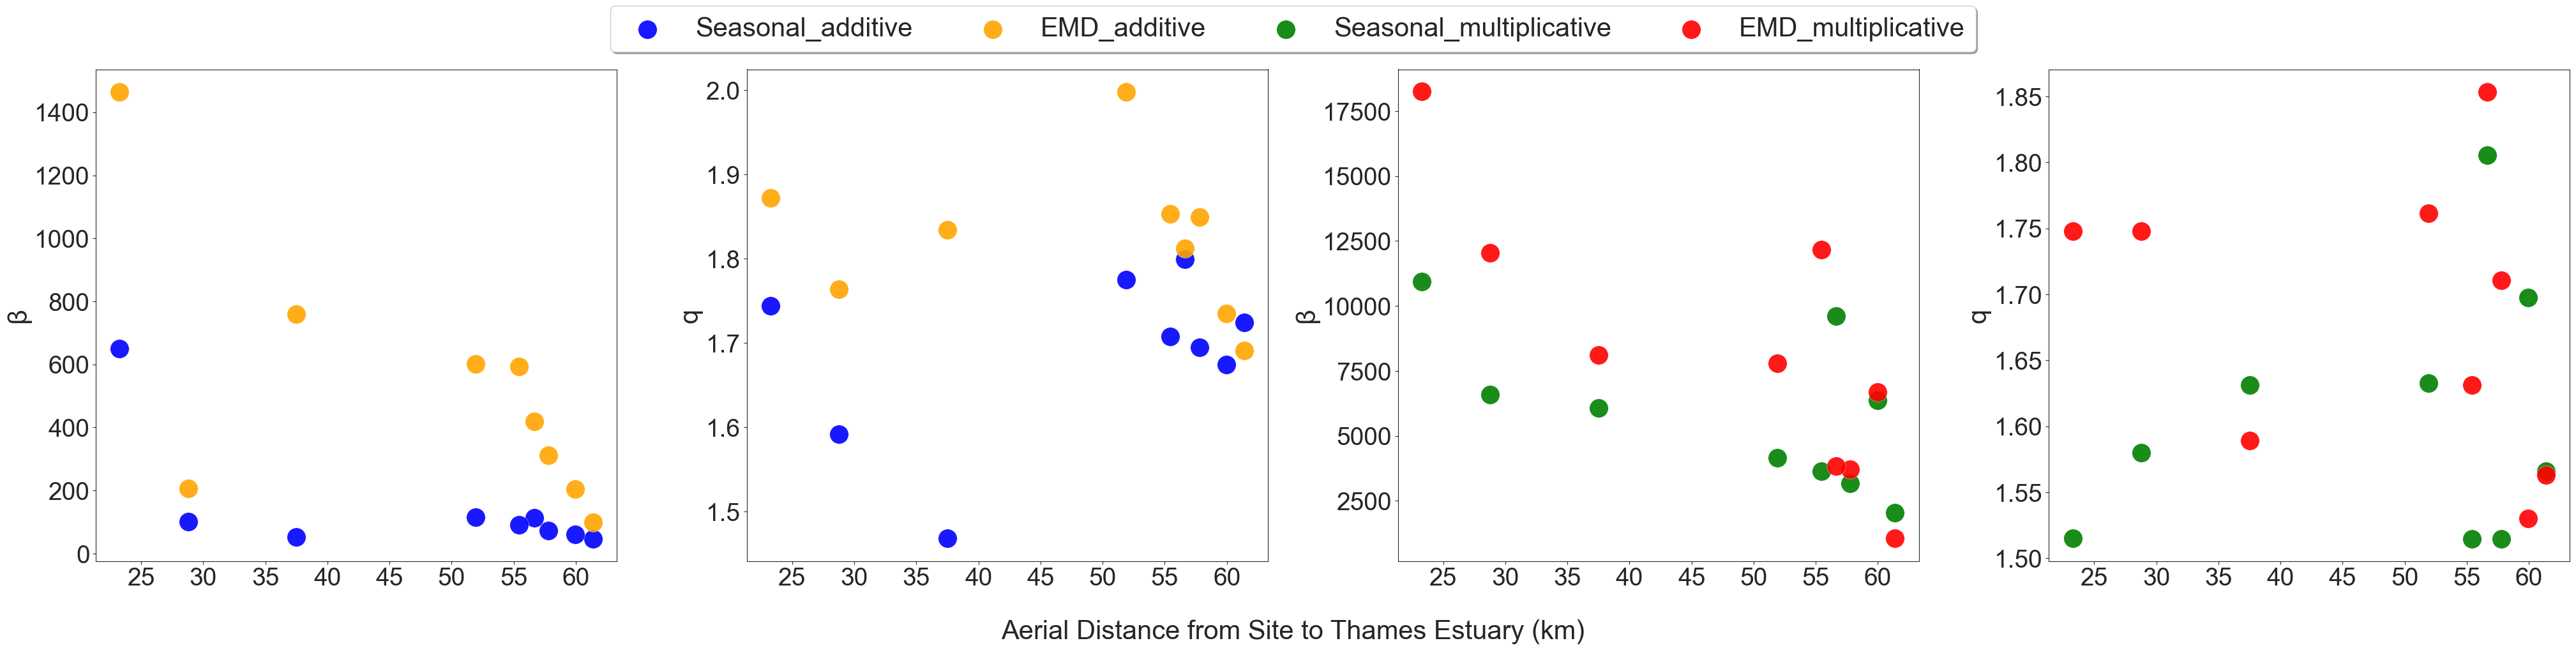

In [9]:
# create a figure
fig = plt.figure()

# to change size of subplot's
fig.set_figheight(10)
fig.set_figwidth(50)

# create grid for different subplots
spec = gridspec.GridSpec(ncols=4, nrows=1,
						wspace=0.25,hspace=0.3)
ax0 = fig.add_subplot(spec[0])
sns.scatterplot(data=df1, x='dist_to_sea', y='b_seasonal', linewidth=0.3,alpha=0.9,s=450,ax=ax0,label='Seasonal_additive',color='blue')
sns.scatterplot(data=df2, x='dist_to_sea', y='b_EMD', linewidth=0.3,alpha=0.9,s=450,ax=ax0,label='EMD_additive',color='orange')
sns.set_style("ticks")
#ax0.set_xlabel('Aerial Distance from Site to Thames Estuary (km)',fontsize=30)
ax0.set_ylabel('\u03B2',fontsize=30)
plt.yticks(fontsize=28)
plt.xticks(fontsize=28)

ax1 = fig.add_subplot(spec[1])
sns.scatterplot(data=df1, x='dist_to_sea', y='q_seasonal', linewidth=0.3,alpha=0.9,s=450,ax=ax1,label='Seasonal_additive',color='blue')
sns.scatterplot(data=df2, x='dist_to_sea', y='q_EMD', linewidth=0.3,alpha=0.9,s=450,ax=ax1,label='EMD_additive',color='orange')
sns.set_style("ticks")
ax1.set_ylabel('q',fontsize=30)
plt.yticks(fontsize=28)
plt.xticks(fontsize=28)

ax2 = fig.add_subplot(spec[2])
sns.scatterplot(data=df3, x='dist_to_sea', y='b_seasonal', linewidth=0.3,alpha=0.9,s=450,ax=ax2,label='Seasonal_multiplicative',color='green')
sns.scatterplot(data=df4, x='dist_to_sea', y='b_EMD', linewidth=0.3,alpha=0.9,s=450,ax=ax2,label='EMD_multiplicative',color='red')
sns.set_style("ticks")
ax2.set_ylabel('\u03B2',fontsize=30)
plt.yticks(fontsize=28)
plt.xticks(fontsize=28)

ax3 = fig.add_subplot(spec[3])
sns.scatterplot(data=df3, x='dist_to_sea', y='q_seasonal', linewidth=0.3,alpha=0.9,s=450,ax=ax3,label='Seasonal_multiplicative',color='green')
sns.scatterplot(data=df4, x='dist_to_sea', y='q_EMD', linewidth=0.3,alpha=0.9,s=450,ax=ax3,label='EMD_multiplicative',color='red')
sns.set_style("ticks")
ax3.set_ylabel('q',fontsize=30)
plt.yticks(fontsize=28)
plt.xticks(fontsize=28)

for ax in [ax0, ax1, ax2, ax3]:
    ax.set_xlabel('')
    ax.grid(False)
#Remove legends from each subplot
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Collect handles and labels from all subplots
handles, labels = [], []
for ax in [ax0, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Create a unified legend
# The 'loc' and 'bbox_to_anchor' parameters may need adjustment depending on your figure layout
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True, shadow=True, fontsize='30')

fig.text(0.5, 0, 'Aerial Distance from Site to Thames Estuary (km)', ha='center', va='center', fontsize=30)

#plt.savefig('b_vs_site.pdf',dpi=75,bbox_inches='tight', pad_inches = 0.05)

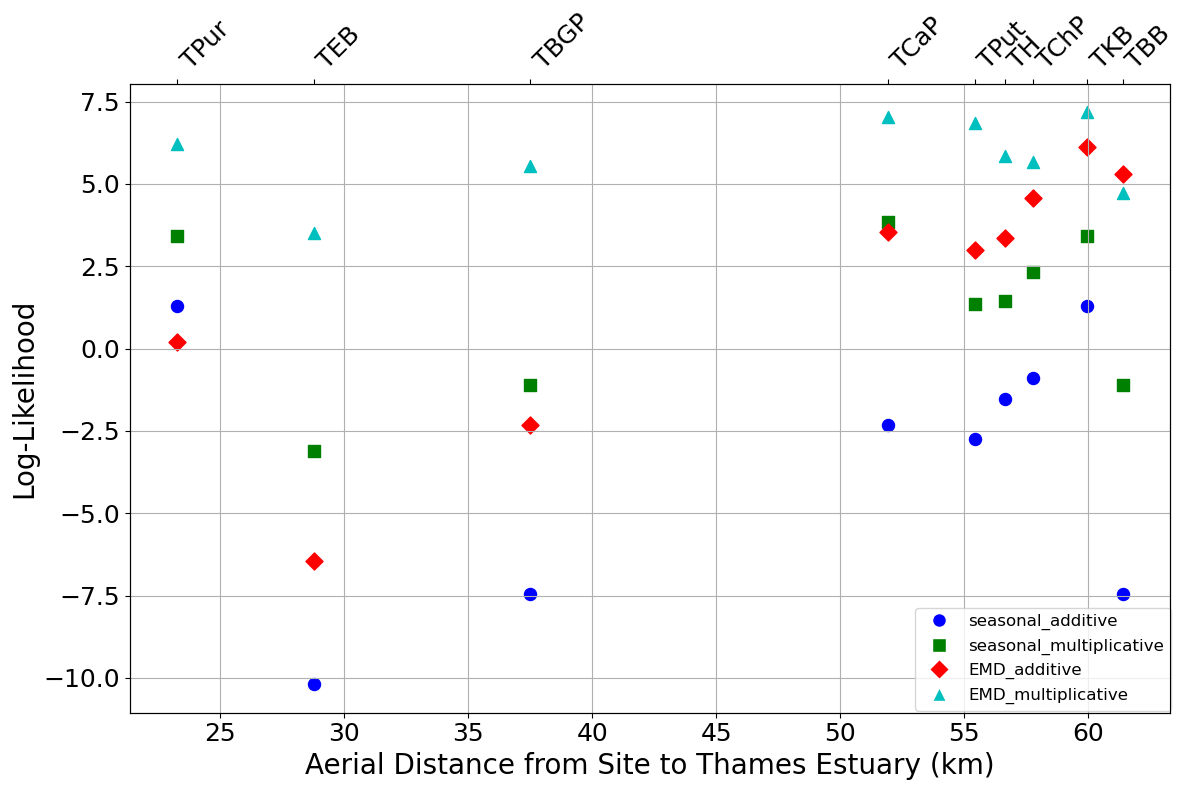

In [4]:
#Performance evaluation
site=['TBB','TKB','TChP','TH','TPut','TCaP','TBGP','TEB','TPur']
method = ['seasonal_additive', 'seasonal_multiplicative', 'EMD_additive', 'EMD_multiplicative']
l_likelihood = {
    'TBB': [-7.446,-1.094,5.311,4.722],
    'TKB': [1.279,3.423,6.127,7.173],
    'TChP': [-0.888,2.324,4.582,5.657],
    'TH': [-1.528,1.447,3.347,5.853],
    'TPut': [-2.742,1.362,2.977,6.842],
    'TCaP': [-2.335,3.842,3.54,7.018],
    'TBGP': [-7.446,-1.094,-2.336,5.535],
    'TEB': [-10.19,-3.123,-6.465,3.501],
    'TPur': [1.279,3.423,0.184,6.215]
    
}

distance_to_sea = {
    'TBB': [61.39],
    'TKB': [59.96],
    'TChP': [57.78],
    'TH': [56.64],
    'TPut': [55.43],
    'TCaP': [51.91],
    'TBGP': [37.5],
    'TEB': [28.77],
    'TPur': [23.26]
    
}


# Create a scatter plot of log-likelihood vs distance to sea for each method
fig, ax1 = plt.subplots(figsize=(12, 8))

colors = ['b', 'g', 'r', 'c']  # Colors for different methods
markers = ['o', 's', 'D', '^']  # Markers for different methods

# Scatter plot
for idx, meth in enumerate(method):
    x = [distance_to_sea[s][0] for s in site]
    y = [l_likelihood[s][idx] for s in site]
    ax1.scatter(x, y, color=colors[idx], marker=markers[idx], label=meth, s= 75)

ax1.set_xlabel('Aerial Distance from Site to Thames Estuary (km)', fontsize=20)
ax1.set_ylabel('Log-Likelihood', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=18)
#ax1.set_title('Log-Likelihood vs Distance to Sea', fontsize=16)
ax1.grid(True)

# Adding secondary x-axis for site names
ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([distance_to_sea[s][0] for s in site])
ax2.set_xticklabels(site, rotation=45, ha='left', fontsize=18)

# Create custom legend
handles = [plt.Line2D([0], [0], marker=markers[i], color='w', markerfacecolor=colors[i], markersize=10, label=method[i]) for i in range(len(method))]
ax1.legend(handles=handles, fontsize=12, loc='lower right', bbox_to_anchor=(1.009, -0.01))

plt.tight_layout()

plt.savefig('site_likelihood.png', bbox_inches='tight', dpi=300)
plt.show()